Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


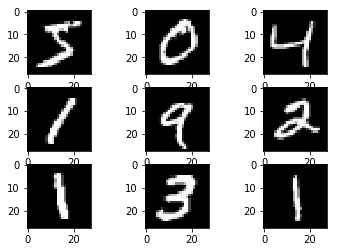

In [2]:
#loading the mnist dataset
import tensorflow as tf
from keras.datasets import mnist
from matplotlib import pyplot
#load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [3]:
#Reshaping the array so that it can work with the Keras
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
#Make sure the values are in float type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Normalizing the RGB codes
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (60000, 28, 28, 1)
Number of images in X_train 60000
Number of images in X_test 10000


In [4]:
#Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
#Creating a Sequential Model and adding the layers
cnn_model = Sequential()
cnn_model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation=tf.nn.relu))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(10,activation=tf.nn.softmax))

In [5]:
#Compiling and fitting the model
cnn_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
cnn_model.fit(x=X_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 47s - loss: 0.2147 - acc: 0.9346    
Epoch 2/10
60000/60000 [==============================] - 52s - loss: 0.0866 - acc: 0.9738    
Epoch 3/10
60000/60000 [==============================] - 49s - loss: 0.0606 - acc: 0.9815    
Epoch 4/10
60000/60000 [==============================] - 47s - loss: 0.0462 - acc: 0.9854    
Epoch 5/10
60000/60000 [==============================] - 45s - loss: 0.0374 - acc: 0.9880    
Epoch 6/10
60000/60000 [==============================] - 42s - loss: 0.0316 - acc: 0.9898    - ETA: 0s - loss: 0.0317 - acc: 0.989 - ETA: 0s - loss: 0.0317 - 
Epoch 7/10
60000/60000 [==============================] - 45s - loss: 0.0254 - acc: 0.9912    
Epoch 8/10
60000/60000 [==============================] - 45s - loss: 0.0214 - acc: 0.9931    
Epoch 9/10
60000/60000 [==============================] - 48s - loss: 0.0205 - acc: 0.9927    
Epoch 10/10
60000/60000 [==============================] - 42s - loss: 0.0188 - 

In [6]:
#Evaluating the model accuracy
cnn_model.evaluate(X_test, y_test)

 9728/10000 [============================>.] - ETA: 0s

[0.057957758174910126, 0.9841]

In [7]:
#Testing the result with the image
image_index = 2334
pyplot.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = cnn_model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

7


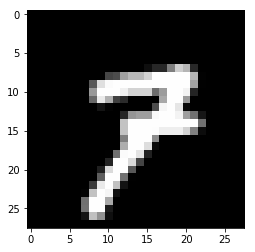

In [8]:
#Displaying the image of the predicted digit
pyplot.imshow(X_test[image_index].reshape(28,28), cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()